# DBSCAN Hyperparameter Tuning Exercise: 
## DBSCAN = Density Based Spatial Clustering for Application with Noises
In this file, I will replicate an exercise published by [Vijini Mallawaarachchi
](https://towardsdatascience.com/@vijinimallawaarachchi) 

Codes and Instruction Source: https://towardsdatascience.com/how-to-use-dbscan-effectively-ed212c02e62



> DBSCAN has a few parameters and out of them, two are crucial. 
  * *__eps__*: the furthest distance at which a point will pick its neighbours.
  * *__min_points__* (min_samples): the number of neighbouring points required for a point to be considered as a dense region, or a valid cluster. 
  
> The most important parameter of DBSCAN can be identified as eps. ... Although for the min_points/min_samples we can give a default value, we cannot do so for eps. This will depend on the distribution of the data itself. Let us do DBSCAN with some guessed values for our dataset.

### 1. Populate sets of spatial points with *__make_blobs__*

[[ 0.8951447   0.35799821]
 [ 1.17640523  0.54001572]
 [ 0.85126135 -0.63502669]
 ...
 [ 2.24284467  1.58073184]
 [ 2.65263897  2.15110367]
 [ 0.70827913 -0.59613368]]


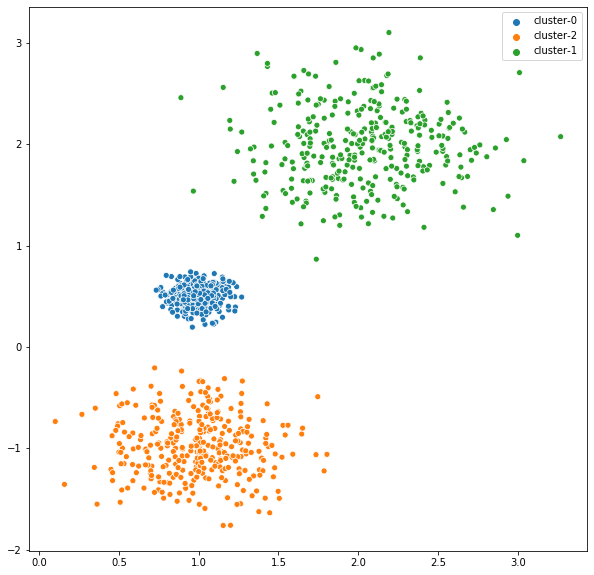

In [12]:
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
centers = [[1, 0.5], [2, 2], [1, -1]]
stds = [0.1, 0.4, 0.3]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=0)
print(X)
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels_true])

In [15]:
labels_true[:5]


array([0, 0, 2, 1, 2])

## 2. Fit DBSCAN Clustering Model

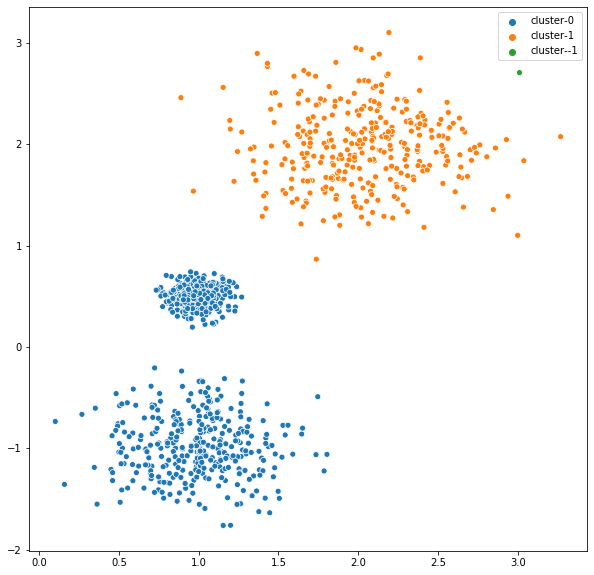

In [5]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
labels = db.labels_
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])

In [14]:
db.labels_[:5]

array([ 0,  0,  3, -1,  3], dtype=int64)

## 3. Comparison across different 'eps'

Let's plot the clustered result over different 'eps'. decrease eps by increasing my denominator in the code from 10 to 1

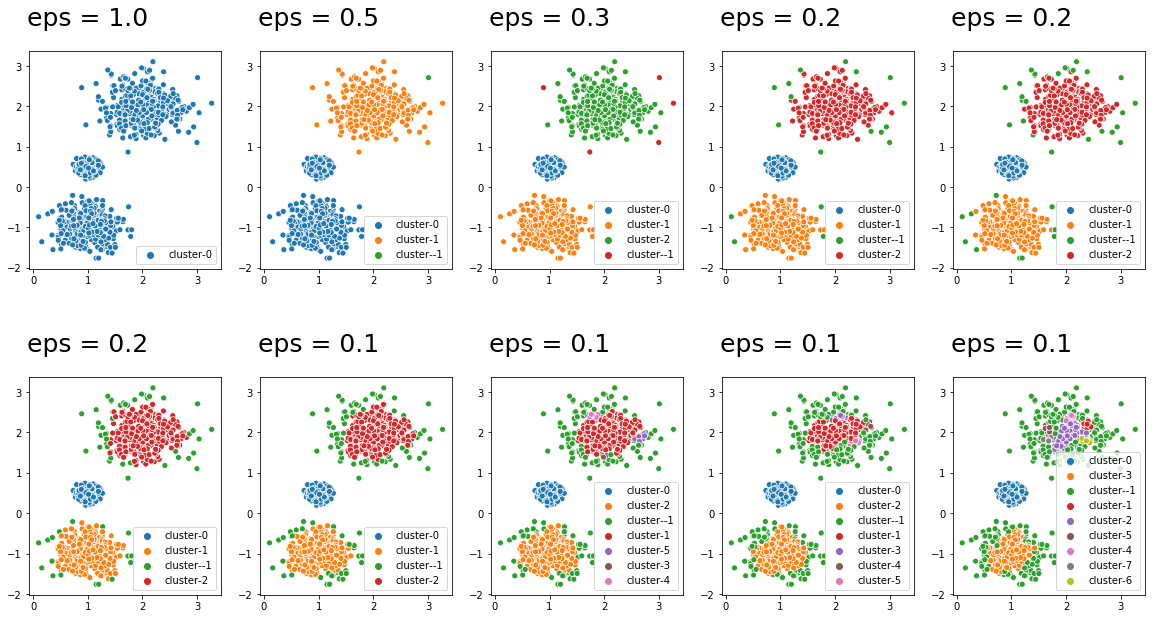

In [11]:
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
#from sklearn.cluster import DBSCAN
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
for x in range(10, 0, -1):
    eps = 1/(11-x)
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    #print(eps)
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 1)), fontsize=25, ha="center")
    sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])
    
    i += 1

## 4. A Systematic Method for Tuning the eps Value: KneeLocator to Detect Elbow Point
(the source: https://towardsdatascience.com/how-to-use-dbscan-effectively-ed212c02e62)


> *Since the eps figure is proportional to the expected number of neighbours discovered, we can use the nearest neighbours to reach a fair estimation for eps. Let us compute the nearest neighbours.*

> Ville Satopaa et al. presented the paper [“Finding a “Kneedle” in a Haystack: Detecting Knee Points in System Behavior”](https://ieeexplore.ieee.org/document/5961514) in the year 2011. In this article, for the purpose of detecting the elbow point (or knee point), I will be using their python library kneed. We can use the following code to find and plot the knee point.




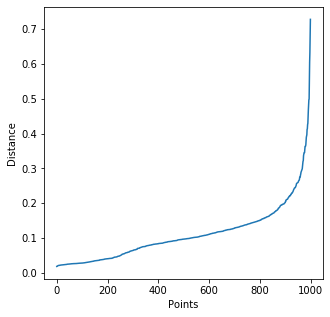

In [16]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,10], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("Distance_curve.png", dpi=300)

First let's install *__kneed__*: https://pypi.org/project/kneed/

In [24]:
!pip install kneed
from kneed import KneeLocator


Distance at Knee:  0.17794276915465104


<Figure size 360x360 with 0 Axes>

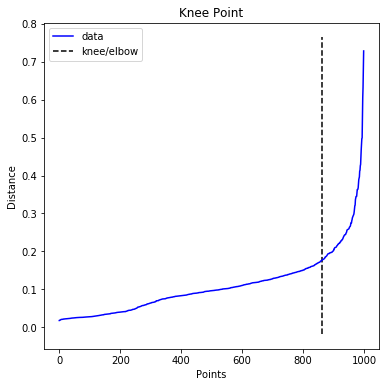

In [26]:
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
knee_eps=distances[knee.knee]
print("Distance at Knee: ", knee_eps)

Now, *__the knee plot__* points at the distance at 0.1779. Call it *__knee_eps__* and plug it into eps for DBSCAN fitting.

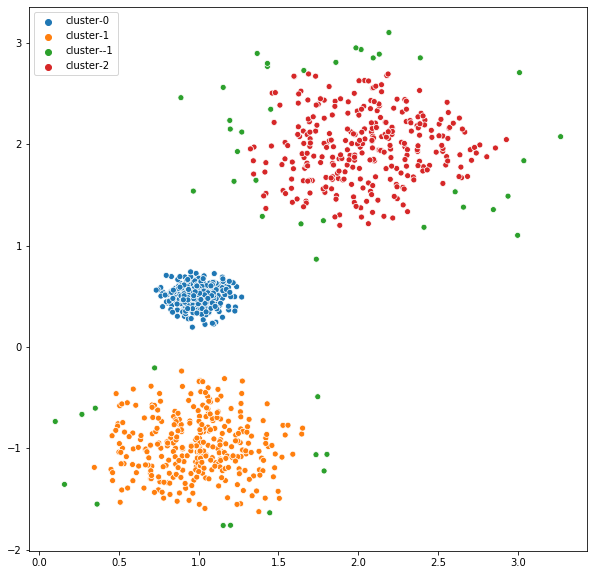

In [27]:
db = DBSCAN(eps=knee_eps, min_samples=10).fit(X)
labels = db.labels_
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])